In [8]:
from numba import jit
import numpy as np
import os
import pandas as pd


def trim_borders(array, top=0, bottom=0, left=0, right=0):
    if len(array.shape) != 2:
        raise ValueError("Input array must be 2D")

    return array[top : array.shape[0] - bottom, left : array.shape[1] - right]


@jit(nopython=True)
def fix_borders(grid):
    y1 = grid.shape[1] - 1

    for x1 in range(grid.shape[0]):
        grid[x1, y1] = grid[x1, y1 - 1]
        grid[x1, 0] = grid[x1, 1]
    x2 = grid.shape[0] - 1
    for y2 in range(grid.shape[1]):
        grid[x2, y2] = grid[x2 - 1, y2]
        grid[0, y2] = grid[1, y2]

    return grid


# Function to load and preprocess data
def load_data(directory, limit=-1):
    data = []
    i = 0
    for filename in os.listdir(directory):
        if limit > 0 and i == limit:
            break
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath, header=None)
            data.append(
                # trim_borders(df.values, top=1, bottom=1, left=1, right=1)
                fix_borders(trim_borders(df.values, top=1, bottom=1, left=1, right=1))
            )
            if i % 50 == 0:
                print(f"Loaded {i} files")
            i += 1
    return np.array(data)


def compress_array_by_factor(original_array, factor=5):
    old_size = original_array.shape
    new_size = (old_size[0] // factor, old_size[1] // factor)

    compressed_array = np.zeros(new_size, dtype=float)

    for i in range(new_size[0]):
        for j in range(new_size[1]):
            block = original_array[
                i * factor : (i + 1) * factor, j * factor : (j + 1) * factor
            ]
            # Average the values in the block
            compressed_array[i, j] = np.mean(block)

    return compressed_array


def fix_n_compress_data(array_of_arrays):
    expanded_arrays = []
    i = 0
    for arr in array_of_arrays:
        expanded_arrays.append(
            compress_array_by_factor(
                fix_borders(trim_borders(arr, top=1, bottom=1, left=1, right=1)), 4
            )
        )
        if i % 100 == 0:
            print(f"Fixed {i} files")
        # if i == 200:
        #     break
        i += 1
    return np.array(expanded_arrays)


def fix_data(array_of_arrays):
    expanded_arrays = []
    i = 0
    for arr in array_of_arrays:
        expanded_arrays.append(
            fix_borders(trim_borders(arr, top=1, bottom=1, left=1, right=1))
        )
        if i % 100 == 0:
            print(f"Fixed {i} files")
        # if i == 200:
        #     break
        i += 1
    return np.array(expanded_arrays)

In [5]:
import numpy as np
import h5py
import os
import pandas as pd

# Directory containing CSV files
input_dir = "output40"
csv_files = [f for f in os.listdir(input_dir) if f.endswith(".csv")]

# Initialize an empty list to store the arrays
data_list = []


i = 0

# Read each CSV file and append the array to the list
for file in csv_files:
    file_path = os.path.join(input_dir, file)
    array = pd.read_csv(file_path, header=None).values.astype(bool)

    data_list.append(array)

    if i % 50 == 0:
        print(f"Loaded {i} files")
    i += 1

# Convert the list to a NumPy array
data = np.array(data_list)

# Save the data to an HDF5 file
with h5py.File("images.h5", "w") as f:
    f.create_dataset("images", data=data, compression="gzip")

Loaded 0 files
Loaded 50 files
Loaded 100 files
Loaded 150 files
Loaded 200 files
Loaded 250 files
Loaded 300 files
Loaded 350 files
Loaded 400 files
Loaded 450 files
Loaded 500 files
Loaded 550 files
Loaded 600 files
Loaded 650 files
Loaded 700 files
Loaded 750 files
Loaded 800 files
Loaded 850 files
Loaded 900 files
Loaded 950 files
Loaded 1000 files
Loaded 1050 files
Loaded 1100 files
Loaded 1150 files
Loaded 1200 files
Loaded 1250 files
Loaded 1300 files
Loaded 1350 files
Loaded 1400 files
Loaded 1450 files
Loaded 1500 files
Loaded 1550 files
Loaded 1600 files
Loaded 1650 files
Loaded 1700 files
Loaded 1750 files
Loaded 1800 files
Loaded 1850 files
Loaded 1900 files
Loaded 1950 files
Loaded 2000 files
Loaded 2050 files
Loaded 2100 files
Loaded 2150 files
Loaded 2200 files
Loaded 2250 files
Loaded 2300 files
Loaded 2350 files
Loaded 2400 files
Loaded 2450 files
Loaded 2500 files
Loaded 2550 files
Loaded 2600 files
Loaded 2650 files
Loaded 2700 files
Loaded 2750 files
Loaded 2800 fil

In [6]:
import h5py

# Load the data from the HDF5 file
with h5py.File('images.h5', 'r') as f:
    images = f['images'][:]

print(images.shape)
print(images.dtype)


(7610, 162, 162)
bool


In [6]:
import numpy as np
import os
import pandas as pd

size = 32

# Directory containing CSV files
input_dir = f"output{size}"
csv_files = [f for f in os.listdir(input_dir) if f.endswith(".csv")]

# Initialize an empty list to store the arrays
data_list = []

i = 0

# Read each CSV file and append the array to the list
for file in csv_files:
    file_path = os.path.join(input_dir, file)
    array = pd.read_csv(file_path, header=None).values.astype(bool)

    data_list.append(array)

    if i % 200 == 0:
        print(f"Loaded {i} files")
    i += 1

# Convert the list to a NumPy array
data = np.array(data_list)

# Save the data to an .npz file
np.savez_compressed(f"data{size}.npz", images=data)

Loaded 0 files
Loaded 200 files
Loaded 400 files
Loaded 600 files
Loaded 800 files
Loaded 1000 files
Loaded 1200 files
Loaded 1400 files
Loaded 1600 files
Loaded 1800 files
Loaded 2000 files
Loaded 2200 files
Loaded 2400 files
Loaded 2600 files
Loaded 2800 files
Loaded 3000 files
Loaded 3200 files
Loaded 3400 files
Loaded 3600 files
Loaded 3800 files
Loaded 4000 files
Loaded 4200 files
Loaded 4400 files
Loaded 4600 files
Loaded 4800 files
Loaded 5000 files
Loaded 5200 files
Loaded 5400 files
Loaded 5600 files
Loaded 5800 files
Loaded 6000 files
Loaded 6200 files
Loaded 6400 files
Loaded 6600 files
Loaded 6800 files
Loaded 7000 files
Loaded 7200 files
Loaded 7400 files
Loaded 7600 files
Loaded 7800 files
Loaded 8000 files
Loaded 8200 files
Loaded 8400 files
Loaded 8600 files
Loaded 8800 files
Loaded 9000 files
Loaded 9200 files
Loaded 9400 files
Loaded 9600 files
Loaded 9800 files
Loaded 10000 files
Loaded 10200 files
Loaded 10400 files
Loaded 10600 files
Loaded 10800 files
Loaded 11000

(5000, 32, 32)
float64
Plotting grid for 0


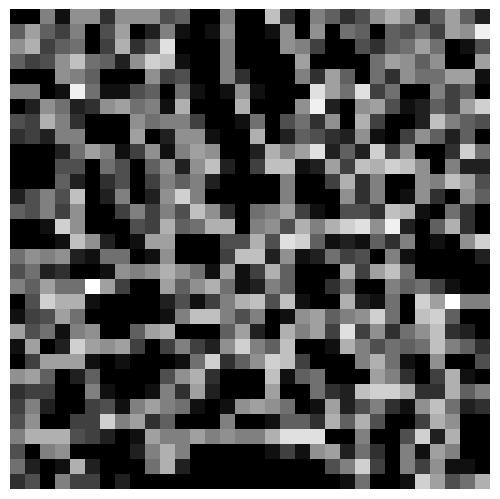

In [4]:
import numpy as np
import matplotlib.pyplot as plt

size = 32

# Load the data from the .npz file
with np.load(f"data_compressed{size}.npz") as data:
    images = data["images"]

print(images.shape)
print(images.dtype)


def plot_grid(grid, img_id):
    print(f"Plotting grid for {img_id}")
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap="gray", interpolation="nearest")
    ax.axis("off")  # Hide the axes
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove padding
    plt.show()


for i in range(100, 101):
    plot_grid(images[i], 0)

In [9]:
und = []

size = 32

with np.load(f"data{size}.npz") as set:
    und = fix_data(set["images"])

# Read each CSV file and append the array to the list
data_list = []


i = 0
for file in und:
    data_list.append(file)

    if i % 200 == 0:
        print(f"Loaded {i} files")
    i += 1

# Convert the list to a NumPy array
data = np.array(data_list)

# Save the data to an .npz file
np.savez_compressed(f"data_fixed{size}.npz", images=data)

Fixed 0 files
Fixed 100 files
Fixed 200 files
Fixed 300 files
Fixed 400 files
Fixed 500 files
Fixed 600 files
Fixed 700 files
Fixed 800 files
Fixed 900 files
Fixed 1000 files
Fixed 1100 files
Fixed 1200 files
Fixed 1300 files
Fixed 1400 files
Fixed 1500 files
Fixed 1600 files
Fixed 1700 files
Fixed 1800 files
Fixed 1900 files
Fixed 2000 files
Fixed 2100 files
Fixed 2200 files
Fixed 2300 files
Fixed 2400 files
Fixed 2500 files
Fixed 2600 files
Fixed 2700 files
Fixed 2800 files
Fixed 2900 files
Fixed 3000 files
Fixed 3100 files
Fixed 3200 files
Fixed 3300 files
Fixed 3400 files
Fixed 3500 files
Fixed 3600 files
Fixed 3700 files
Fixed 3800 files
Fixed 3900 files
Fixed 4000 files
Fixed 4100 files
Fixed 4200 files
Fixed 4300 files
Fixed 4400 files
Fixed 4500 files
Fixed 4600 files
Fixed 4700 files
Fixed 4800 files
Fixed 4900 files
Fixed 5000 files
Fixed 5100 files
Fixed 5200 files
Fixed 5300 files
Fixed 5400 files
Fixed 5500 files
Fixed 5600 files
Fixed 5700 files
Fixed 5800 files
Fixed 590

In [10]:
und = []

size = 32

with np.load(f"data{size}.npz") as set:
    und = fix_n_compress_data(set["images"])

# Read each CSV file and append the array to the list
data_list = []


i = 0
for file in und:
    data_list.append(file)

    if i % 200 == 0:
        print(f"Loaded {i} files")
    i += 1

# Convert the list to a NumPy array
data = np.array(data_list)

# Save the data to an .npz file
np.savez_compressed(f"data_compressed{size}.npz", images=data)

Fixed 0 files
Fixed 100 files
Fixed 200 files
Fixed 300 files
Fixed 400 files
Fixed 500 files
Fixed 600 files
Fixed 700 files
Fixed 800 files
Fixed 900 files
Fixed 1000 files
Fixed 1100 files
Fixed 1200 files
Fixed 1300 files
Fixed 1400 files
Fixed 1500 files
Fixed 1600 files
Fixed 1700 files
Fixed 1800 files
Fixed 1900 files
Fixed 2000 files
Fixed 2100 files
Fixed 2200 files
Fixed 2300 files
Fixed 2400 files
Fixed 2500 files
Fixed 2600 files
Fixed 2700 files
Fixed 2800 files
Fixed 2900 files
Fixed 3000 files
Fixed 3100 files
Fixed 3200 files
Fixed 3300 files
Fixed 3400 files
Fixed 3500 files
Fixed 3600 files
Fixed 3700 files
Fixed 3800 files
Fixed 3900 files
Fixed 4000 files
Fixed 4100 files
Fixed 4200 files
Fixed 4300 files
Fixed 4400 files
Fixed 4500 files
Fixed 4600 files
Fixed 4700 files
Fixed 4800 files
Fixed 4900 files
Fixed 5000 files
Fixed 5100 files
Fixed 5200 files
Fixed 5300 files
Fixed 5400 files
Fixed 5500 files
Fixed 5600 files
Fixed 5700 files
Fixed 5800 files
Fixed 590